## <u> Implementing Simple Linear Regression </u>

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
area = np.array([200,300,500,600,1000,1200])
price = np.array([30,45,55,70,80,95])

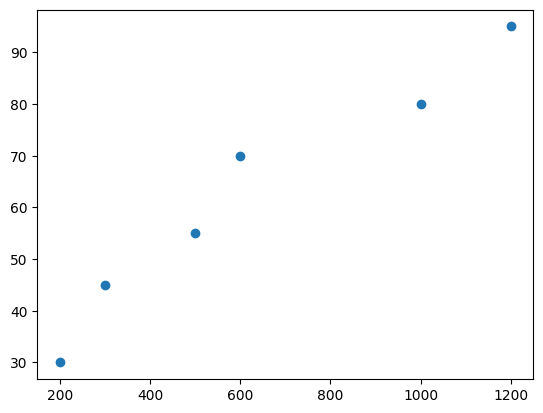

In [90]:
plt.scatter(area,price)
plt.show()

area - x

price - y

slope - m

intercept - b

### Let's take some random values for slope and intercept

In [91]:
slope = 0
intercept = 30

In [92]:
price_predicted = (slope * area) + intercept
price_predicted

array([30, 30, 30, 30, 30, 30])

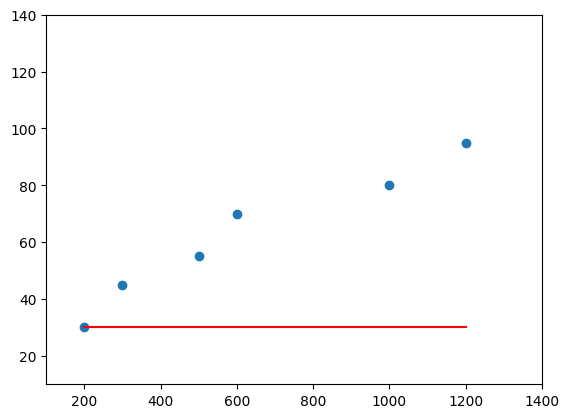

In [93]:
plt.scatter(area,price)
plt.plot(area,price_predicted, color='red')
plt.xlim((100,1400))
plt.ylim((10,140))
plt.show()

### OLS (Ordinary Least Square) to find best fit line
(is a type of linear least squares method for choosing the unknown parameters in a linear regression model)

![image-2.png](attachment:image-2.png)

![image.png](attachment:image.png)

In [94]:
xy_sum = (area*price).sum()
x_sum = area.sum()
ysum = price.sum()
x_square_sum = (area ** 2).sum()
x_sum_square = (area.sum()) ** 2
n = len(area)

In [95]:
price_mean = price.mean()
area_mean = area.mean()

In [96]:
slope = (n*xy_sum - (x_sum*ysum))/(n*x_square_sum - x_sum_square) #Replaced y_sum with ysum
slope

0.058836206896551724

In [97]:
intercept = price_mean - slope*area_mean
intercept

25.23706896551724

In [98]:
price_predicted = (slope * area) + intercept
price_predicted

array([37.00431034, 42.88793103, 54.65517241, 60.5387931 , 84.07327586,
       95.84051724])

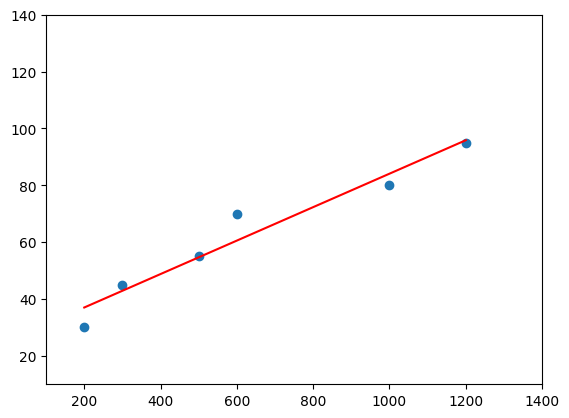

In [99]:
plt.scatter(area,price)
plt.plot(area,price_predicted, color='red')
plt.xlim((100,1400))
plt.ylim((10,140))
plt.show()

## Linear Regression from Scikit Learn

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
lr = LinearRegression()

In [102]:
lr.fit(area.reshape(-1,1),price)

LinearRegression()

In [103]:
lr.coef_

array([0.05883621])

In [104]:
lr.intercept_

25.23706896551724

In [105]:
y_pred = lr.predict(area.reshape(-1,1))
y_pred

array([37.00431034, 42.88793103, 54.65517241, 60.5387931 , 84.07327586,
       95.84051724])

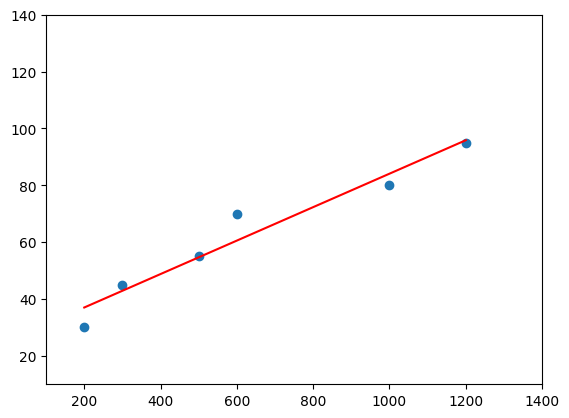

In [106]:
plt.scatter(area,price)
plt.plot(area,y_pred, color='red')
plt.xlim((100,1400))
plt.ylim((10,140))
plt.show()

## On Real dataset

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv(r'/content/drive/MyDrive/ML Files/advertising.csv')

In [143]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [109]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [110]:
df.shape

(200, 4)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [112]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [113]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


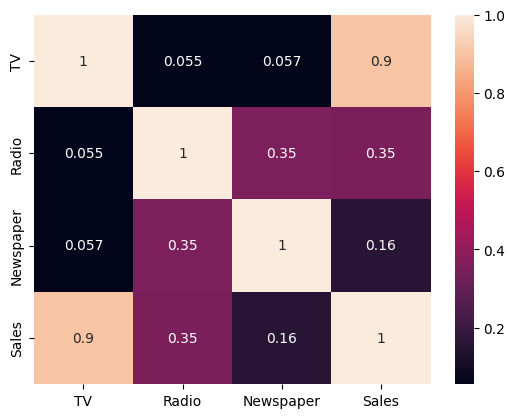

In [114]:
sns.heatmap(df.corr(), annot=True)
plt.show()

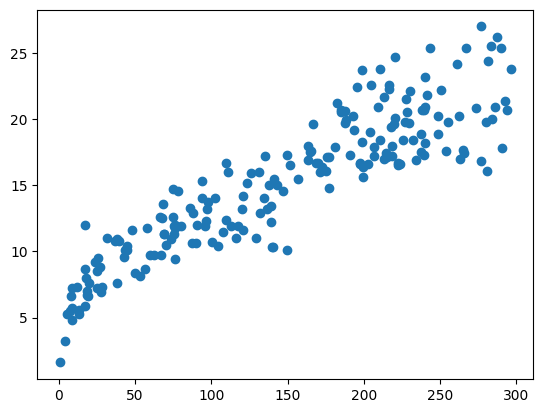

In [115]:
plt.scatter(df['TV'],df['Sales'])
plt.show()

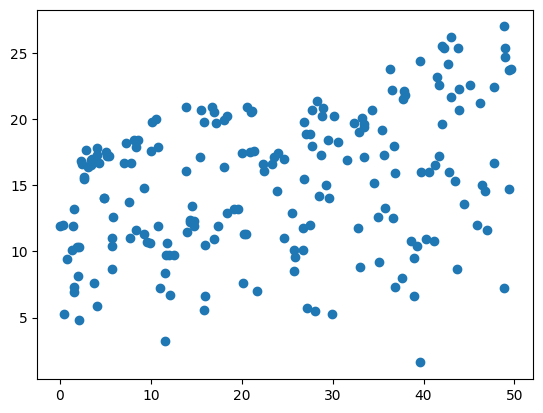

In [116]:
plt.scatter(df['Radio'],df['Sales'])
plt.show()

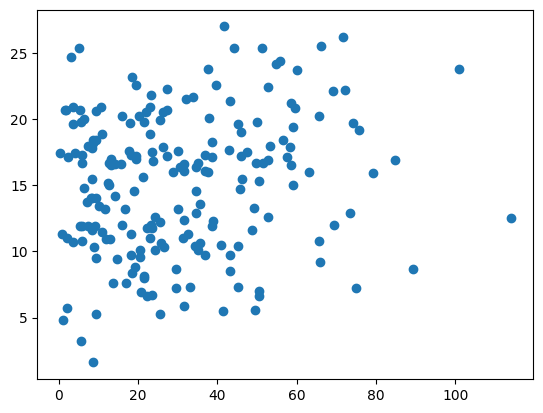

In [117]:
plt.scatter(df['Newspaper'],df['Sales'])
plt.show()

#### Let's implement simple Linear regression on TV and Sales

In [118]:
X = df[['TV']]
y = df[['Sales']]

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=24)

In [121]:
X_train.shape

(140, 1)

In [122]:
X_test.shape

(60, 1)

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [125]:
lr.coef_

array([[0.05654813]])

In [126]:
lr.intercept_

array([6.90928118])

In [127]:
y_pred = lr.predict(X_test)
print(y_pred)

[[16.91830107]
 [21.35167485]
 [23.67014838]
 [11.84027855]
 [19.75701744]
 [12.23611549]
 [10.90157951]
 [ 9.14293251]
 [14.35667055]
 [19.37814494]
 [ 8.4247712 ]
 [ 8.52655784]
 [18.45075552]
 [21.77578586]
 [12.34921176]
 [22.7540686 ]
 [14.99000966]
 [19.16891684]
 [21.76447623]
 [19.92100703]
 [ 8.01762462]
 [10.77717361]
 [15.23882146]
 [14.79774601]
 [20.0341033 ]
 [18.98230799]
 [21.26119783]
 [19.57606341]
 [23.17252479]
 [19.05016576]
 [22.38650572]
 [12.21915105]
 [ 7.21464111]
 [13.1182664 ]
 [20.46952394]
 [15.76471911]
 [11.75545634]
 [ 9.73668793]
 [14.32274167]
 [11.33134533]
 [ 7.40124995]
 [17.52902092]
 [16.43198711]
 [17.71562977]
 [ 7.65006175]
 [19.48558639]
 [16.21144938]
 [13.72333144]
 [13.46886483]
 [12.58671393]
 [14.78078157]
 [ 7.14112853]
 [10.74324473]
 [20.33380842]
 [19.08974945]
 [21.09720824]
 [ 7.8819091 ]
 [20.47517876]
 [12.71677464]
 [18.08319265]]


In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [129]:
mse = mean_squared_error(y_test, y_pred)
mse

4.683240455466782

In [130]:
rmse = np.sqrt(mse)
rmse

2.164079586213682

In [131]:
r2s = r2_score(y_test, y_pred)
r2s

0.8120063673827431

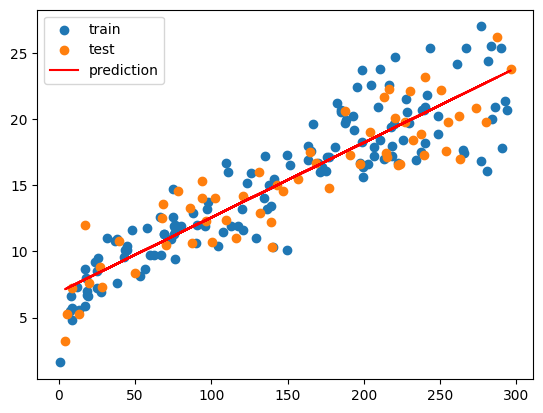

In [132]:
plt.figure()
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.legend(labels=['train','test','prediction'])
plt.show()

Let's create a function for the model

In [144]:
def ml_model(X):
    y = df[['Sales']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    print('Coef',lr.coef_)
    print('intercept',lr.intercept_)
    print('r2_score',r2_score(y_test, y_pred))
    plt.figure()
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test)
    plt.plot(X_test, y_pred, color='red')
    plt.legend(labels=['train','test','prediction'])
    plt.show()

Coef [[0.0188608]]
intercept [14.68759919]
r2_score 0.03838173814554813


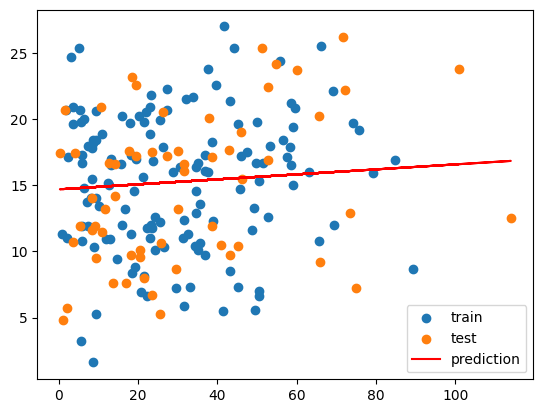

In [134]:
ml_model(df[['Newspaper']])

In [145]:
def ml_model1(X):
    y = df[['TV']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    print('Coef',lr.coef_)
    print('intercept',lr.intercept_)
    print('r2_score',r2_score(y_test, y_pred))
    plt.figure()
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test)
    plt.plot(X_test, y_pred, color='red')
    plt.legend(labels=['train','test','prediction'])
    plt.show()

Coef [[1.]]
intercept [2.84217094e-14]
r2_score 1.0


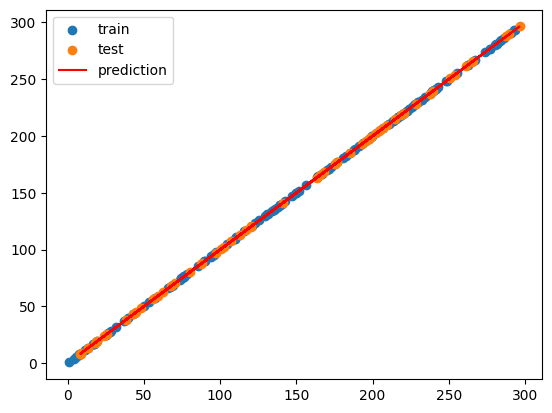

In [146]:
ml_model1(df[['TV']])

In [147]:
def ml_model2(X):
    y = df[['Radio']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    print('Coef',lr.coef_)
    print('intercept',lr.intercept_)
    print('r2_score',r2_score(y_test, y_pred))
    plt.figure()
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test)
    plt.plot(X_test, y_pred, color='red')
    plt.legend(labels=['train','test','prediction'])
    plt.show()

Coef [[1.]]
intercept [3.55271368e-15]
r2_score 1.0


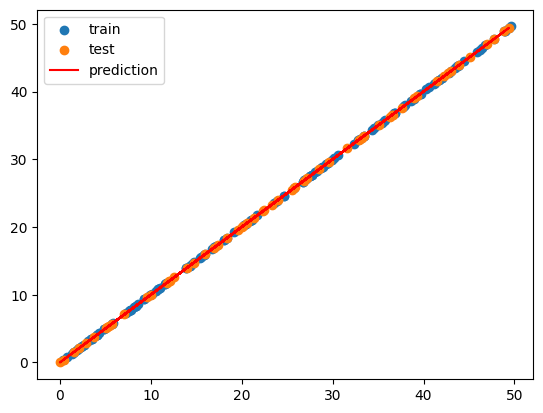

In [148]:
ml_model2(df[['Radio']])

## <u> Implementing Multiple Linear Regression </u>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

In [135]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

<ipython-input-135-f27a1d36e8b5>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [137]:
len(dataset)

200

In [138]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [139]:
dataset.shape

(200, 4)

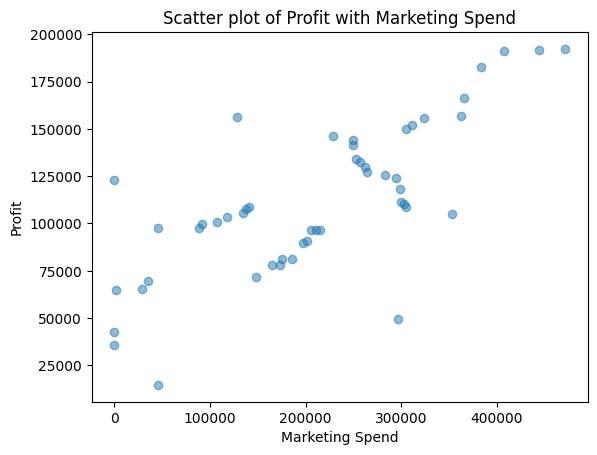

In [151]:
# Importing the dataset
dataset = pd.read_csv(r'/content/drive/MyDrive/ML Files/50_Startups.csv')

# Check for possible typos and correct the column name
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5) # Removed space in 'Marketing Spend'
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

# If the column is still not found, check the CSV file
# to ensure that the column exists and is named correctly
#!head /content/drive/MyDrive/ML\ Files/advertising.csv

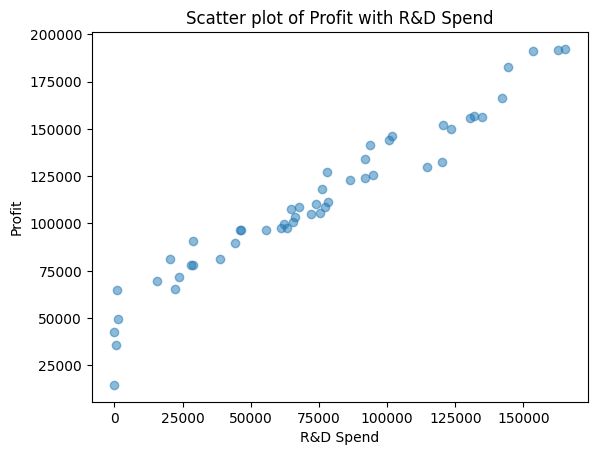

In [152]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

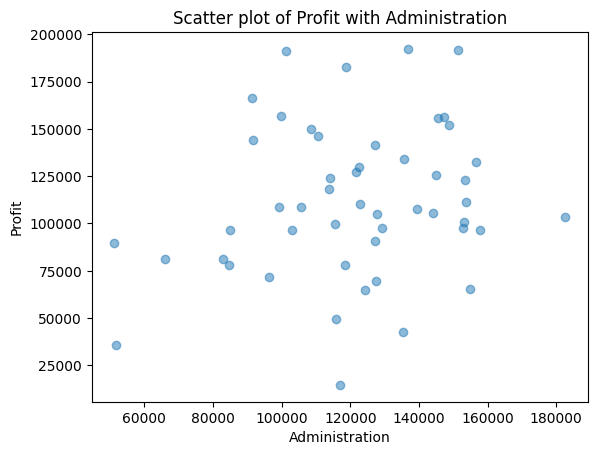

In [153]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

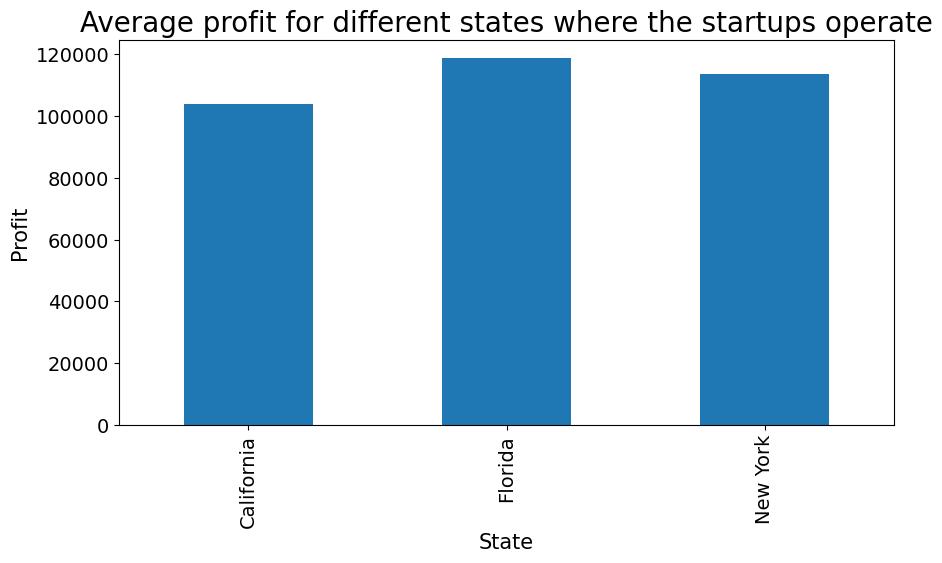

In [154]:
# Create the figure object
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

In [156]:
dataset.State.value_counts()

,count
State,
New York,17
California,17
Florida,16


In [157]:
# Create dummy variables for the catgeorical variable State
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [158]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


<Axes: >

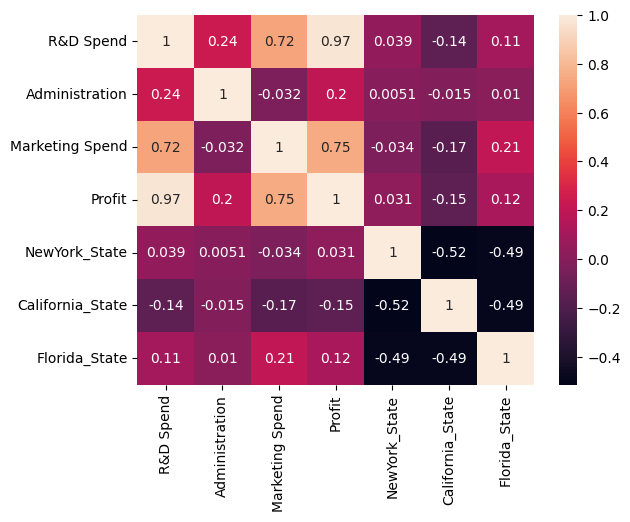

In [159]:
sns.heatmap(dataset.corr(), annot=True)

In [160]:
dependent_variable = 'Profit'

In [161]:
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [162]:
independent_variables

['Florida_State',
 'Marketing Spend',
 'California_State',
 'R&D Spend',
 'NewYork_State',
 'Administration']

In [163]:
# Create the data of independent variables
X = dataset[independent_variables].values

# Create the dependent variable data
y = dataset[dependent_variable].values

In [164]:
dataset[independent_variables]

,Florida_State,Marketing Spend,California_State,R&D Spend,NewYork_State,Administration
0,0,471784.10,0,165349.20,1,136897.80
1,0,443898.53,1,162597.70,0,151377.59
2,1,407934.54,0,153441.51,0,101145.55
3,0,383199.62,0,144372.41,1,118671.85
4,1,366168.42,0,142107.34,0,91391.77
5,0,362861.36,0,131876.90,1,99814.71
6,0,127716.82,1,134615.46,0,147198.87
7,1,323876.68,0,130298.13,0,145530.06
8,0,311613.29,0,120542.52,1,148718.95
9,0,304981.62,1,123334.88,0,108679.17


In [165]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [166]:
X_train[0:10]

array([[1.0000000e+00, 2.1463481e+05, 0.0000000e+00, 5.5493950e+04,
        0.0000000e+00, 1.0305749e+05],
       [0.0000000e+00, 2.0551764e+05, 0.0000000e+00, 4.6014020e+04,
        1.0000000e+00, 8.5047440e+04],
       [1.0000000e+00, 1.3405007e+05, 0.0000000e+00, 7.5328870e+04,
        0.0000000e+00, 1.4413598e+05],
       [0.0000000e+00, 2.1079767e+05, 1.0000000e+00, 4.6426070e+04,
        0.0000000e+00, 1.5769392e+05],
       [1.0000000e+00, 2.9491957e+05, 0.0000000e+00, 9.1749160e+04,
        0.0000000e+00, 1.1417579e+05],
       [1.0000000e+00, 3.2387668e+05, 0.0000000e+00, 1.3029813e+05,
        0.0000000e+00, 1.4553006e+05],
       [1.0000000e+00, 2.5651292e+05, 0.0000000e+00, 1.1994324e+05,
        0.0000000e+00, 1.5654742e+05],
       [0.0000000e+00, 1.9039300e+03, 0.0000000e+00, 1.0002300e+03,
        1.0000000e+00, 1.2415304e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.4205000e+02,
        1.0000000e+00, 5.1743150e+04],
       [0.0000000e+00, 1.0713838e+05,

In [167]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [168]:
X_train[0:10]

array([[1.        , 0.45494286, 0.        , 0.33561668, 0.        ,
        0.48655174],
       [0.        , 0.43561799, 0.        , 0.2782839 , 1.        ,
        0.3173015 ],
       [1.        , 0.28413435, 0.        , 0.45557444, 0.        ,
        0.87258866],
       [0.        , 0.44680961, 1.        , 0.2807759 , 0.        ,
        1.        ],
       [1.        , 0.62511553, 0.        , 0.55488118, 0.        ,
        0.59103645],
       [1.        , 0.68649342, 0.        , 0.7880179 , 0.        ,
        0.88568959],
       [1.        , 0.54370828, 0.        , 0.72539353, 0.        ,
        0.98922572],
       [0.        , 0.0040356 , 0.        , 0.0060492 , 1.        ,
        0.6847981 ],
       [0.        , 0.        , 0.        , 0.00327821, 1.        ,
        0.00432296],
       [0.        , 0.22709197, 0.        , 0.39676926, 1.        ,
        0.95618996]])

In [169]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [170]:
regressor.intercept_

44153.95466784862

In [171]:
regressor.coef_

array([-8.72645791e+02,  1.72720281e+04,  8.66383692e+01,  1.27892182e+05,
        7.86007422e+02,  3.49927567e+03])

In [172]:
y_pred_train = regressor.predict(X_train)

In [173]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [174]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [175]:
#Predicted profit on the test data
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [176]:
# Actual profits on test data
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [177]:
mean_squared_error(y_test, y_pred)

83502864.03257716

In [178]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.666612578969

In [179]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

9137.990152794933

In [180]:
r2_score(y_train, y_pred_train)

0.9501847627493607

In [181]:
r2_score(y_test, y_pred)

0.9347068473282427

### let's find residual/error

[   267.17840204  11677.12239184  13674.21154826   5822.73148742
  12512.90778945 -11152.93230165  13377.36790324  -1308.17374687
  -3617.18533012  -1733.1256955 ]


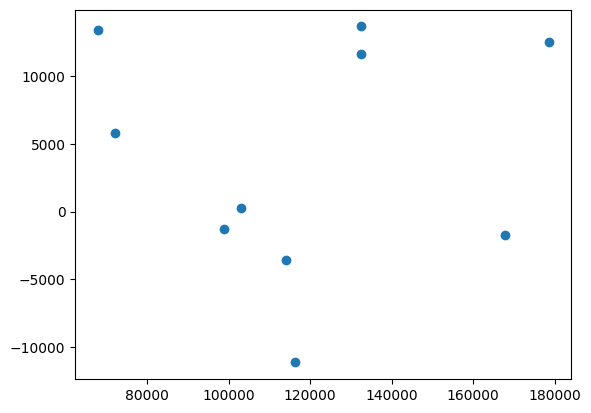

In [182]:
residual = y_test - y_pred
print(residual)
plt.scatter(y_pred,residual)

<Axes: ylabel='Count'>

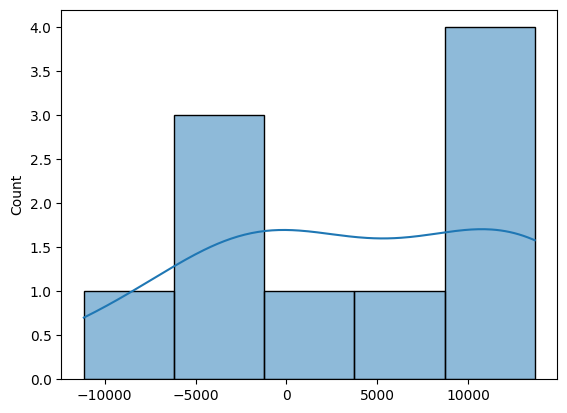

In [183]:
sns.histplot(residual, kde=True)

## Polynomial Regression

In [184]:
# Linear equation
def poly_1(x):

    y = 4*x + 5
    return y

# Quadratic equation
def poly_2(x):

    y = 6*(x**2) + 4*x + 5
    return y

# Cubic equation
def poly_3(x):

    y = 8*(x**3) + 6*(x**2) + 4*x + 5
    return y

def plot(x,y):

    plt.figure()
    plt.plot(x,y)
    plt.show()

In [185]:
x = np.arange(-100,100)
x

array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
        -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
        -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
        -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
        -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
        -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
        -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
        -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
        -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
         -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
         10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
         21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
         32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
         43,   44,   45,   46,   47,   48,   49,   

In [186]:
y1 = poly_1(x)
y2 = poly_2(x)
y3 = poly_3(x)

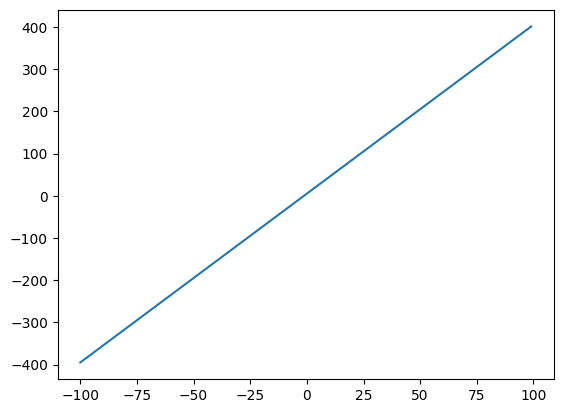

In [187]:
plot(x,y1)

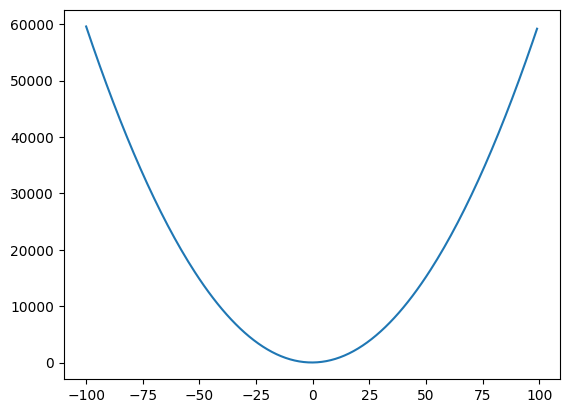

In [188]:
plot(x,y2)

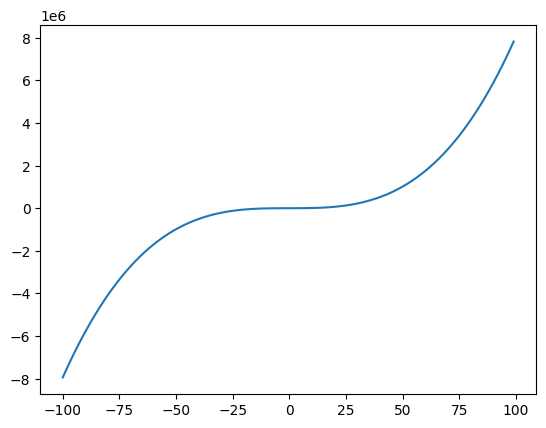

In [189]:
plot(x,y3)

## Polynomial Regression on sample data

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

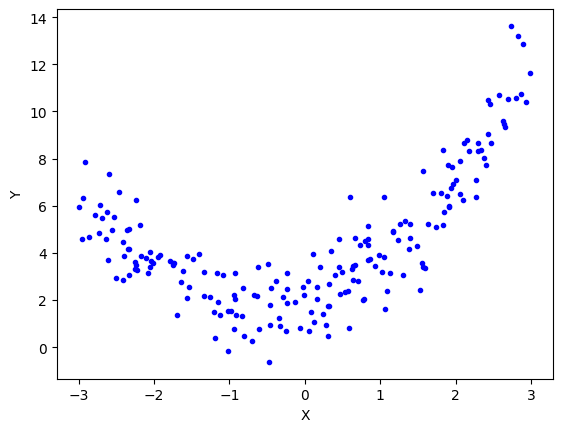

In [191]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)

#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [192]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [193]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.23230541998251875


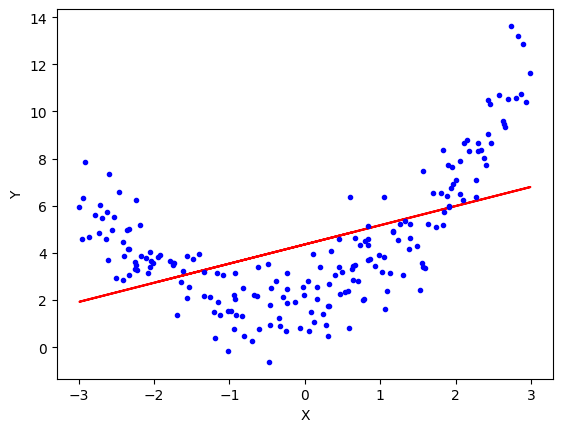

In [194]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Let's apply polynomial regression

In [195]:
from sklearn.preprocessing import PolynomialFeatures

In [196]:
# applying polynomial regression degree 2
# PolynomialFeatures is a method in sklearn
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.8292753083292844


In [197]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.9145524  0.79852951]]
[1.95781427]


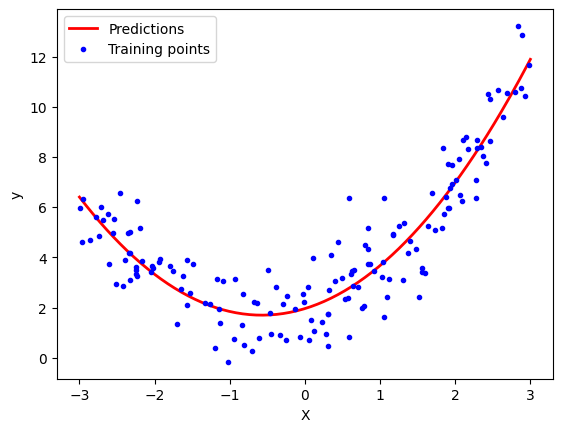

In [198]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
# plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()